# Geopandas

#### Find the geopandas documentation under: http://geopandas.org/index.html

#### Find a helpful tutorial under: https://github.com/jorisvandenbossche/geopandas-tutorial


## Topic Overview: GIS
**Definition:** "A GIS is a system of hardware, software and procedures to facilitate the management, manipulation, analysis, modelling, representation and display of georeferenced data to solve complex problems regarding planning and management of resources" (National Centre of Geographic Information and Analysis, 1990) This implicates that in a group of maps of the same territory a given location has the same coordinates in all the maps.

![Layers](./Input/fig_1_capas_gis.jpg)

Imgage: https://geopaisa.blog/2017/03/08/que-es-un-sig/ <br>
Source: http://www.geogra.uah.es/patxi/gisweb/GISModule/GISTheory.pdf


### Import packages (numpy, matplotlib and pandas)

In [1]:
!pip install mapclassify
!pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Geospatial data
Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ... We can use the GeoPandas library to read many of those GIS file formats.

download gejson file from eurostat:
https://ec.europa.eu/eurostat/de/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts <br>

In [2]:
# https://ec.europa.eu/eurostat/cache/GISCO/distribution/v2/nuts/download/ref-nuts-2016-60m.geojson.zip

In [3]:
# read the .geojson-file and assign it to a new variable. The result is a geodataframe
nuts_gdf = gpd.read_file('Input/ref-nuts-2016-60m/NUTS_RG_60M_2016_3035.geojson')

In [4]:
nuts_gdf

,id,LEVL_CODE,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ052,3,CZ052,CZ,Královéhradecký kraj,Královéhradecký kraj,4,2,3,CZ052,"POLYGON ((4752267.584 3079151.392, 4768791.122..."
1,CZ053,3,CZ053,CZ,Pardubický kraj,Pardubický kraj,4,3,3,CZ053,"POLYGON ((4812156.935 2965655.696, 4782782.205..."
2,CZ063,3,CZ063,CZ,Kraj Vysočina,Kraj Vysočina,4,3,3,CZ063,"POLYGON ((4782782.205 2960974.984, 4775981.726..."
3,CZ064,3,CZ064,CZ,Jihomoravský kraj,Jihomoravský kraj,4,2,3,CZ064,"POLYGON ((4841157.679 2932184.124, 4851727.509..."
4,CZ071,3,CZ071,CZ,Olomoucký kraj,Olomoucký kraj,2,2,3,CZ071,"POLYGON ((4849853.547 3042644.759, 4835135.745..."
...,...,...,...,...,...,...,...,...,...,...,...
2011,SK,0,SK,SK,SLOVENSKO,SLOVENSKO,0,0,0,SK,"POLYGON ((5003133.934 2988592.054, 5038951.099..."
2012,TR,0,TR,TR,TÜRKIYE,TÜRKIYE,0,0,0,TR,"MULTIPOLYGON (((6409166.817 2417609.250, 64409..."
2013,UK,0,UK,UK,UNITED KINGDOM,UNITED KINGDOM,0,0,0,UK,"MULTIPOLYGON (((3621681.091 3203977.225, 36271..."
2014,SE2,1,SE2,SE,SÖDRA SVERIGE,SÖDRA SVERIGE,0,0,0,SE2,"MULTIPOLYGON (((4848366.974 3829771.163, 48191..."


### GeoDataFrame
A GeoDataFrame is a tabular data structure that contains a **GeoSeries**. <br>

The most important property of a GeoDataFrame is that it always has one GeoSeries, which is referred to as the GeoDataFrame’s **“geometry”**. 

The other columns are the **attributes** that describe each of the geometries.

Such a GeoDataFrame is just like a pandas DataFrame, but with some additional functionality for working with geospatial data:
- A .geometry attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the .geometry attribute.
- It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...)

### GeoSeries

A GeoSeries is essentially a vector where each entry in the vector is a set of shapes. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

geopandas has three basic classes of geometric objects:

    Points / Multi-Points

    Lines / Multi-Lines

    Polygons / Multi-Polygons

#### Take a look at the GeoDataFrame. Which column contains GeoSeries?

In [5]:
nuts_gdf

,id,LEVL_CODE,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ052,3,CZ052,CZ,Královéhradecký kraj,Královéhradecký kraj,4,2,3,CZ052,"POLYGON ((4752267.584 3079151.392, 4768791.122..."
1,CZ053,3,CZ053,CZ,Pardubický kraj,Pardubický kraj,4,3,3,CZ053,"POLYGON ((4812156.935 2965655.696, 4782782.205..."
2,CZ063,3,CZ063,CZ,Kraj Vysočina,Kraj Vysočina,4,3,3,CZ063,"POLYGON ((4782782.205 2960974.984, 4775981.726..."
3,CZ064,3,CZ064,CZ,Jihomoravský kraj,Jihomoravský kraj,4,2,3,CZ064,"POLYGON ((4841157.679 2932184.124, 4851727.509..."
4,CZ071,3,CZ071,CZ,Olomoucký kraj,Olomoucký kraj,2,2,3,CZ071,"POLYGON ((4849853.547 3042644.759, 4835135.745..."
...,...,...,...,...,...,...,...,...,...,...,...
2011,SK,0,SK,SK,SLOVENSKO,SLOVENSKO,0,0,0,SK,"POLYGON ((5003133.934 2988592.054, 5038951.099..."
2012,TR,0,TR,TR,TÜRKIYE,TÜRKIYE,0,0,0,TR,"MULTIPOLYGON (((6409166.817 2417609.250, 64409..."
2013,UK,0,UK,UK,UNITED KINGDOM,UNITED KINGDOM,0,0,0,UK,"MULTIPOLYGON (((3621681.091 3203977.225, 36271..."
2014,SE2,1,SE2,SE,SÖDRA SVERIGE,SÖDRA SVERIGE,0,0,0,SE2,"MULTIPOLYGON (((4848366.974 3829771.163, 48191..."


#### Plot the GeoDataFrame. 

<Axes: >

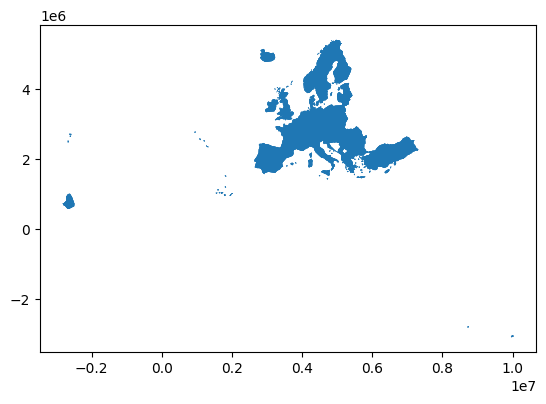

In [6]:
nuts_gdf.plot()

#### Plot Germany. 

<Axes: >

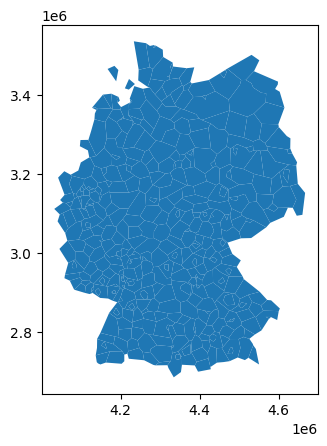

In [7]:
de_gdf = nuts_gdf[nuts_gdf['CNTR_CODE'] == 'DE']
de_gdf = de_gdf[de_gdf['LEVL_CODE']==3]
de_gdf.plot()

#### Plot Berlin

<Axes: >

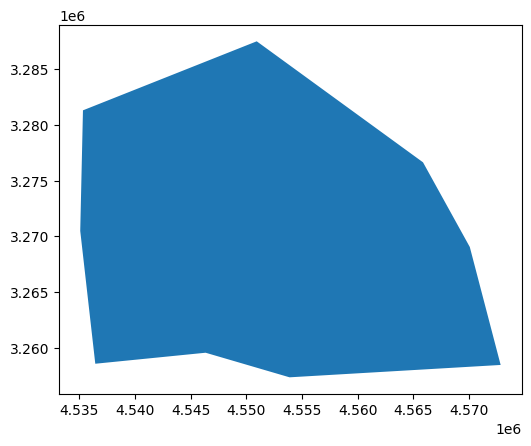

In [8]:
nuts_gdf[nuts_gdf['NUTS_ID'] == 'DE300'].plot()

In [9]:
de_gdf[de_gdf.NUTS_ID == 'DE300']

,id,LEVL_CODE,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
307,DE300,3,DE300,DE,Berlin,Berlin,4,1,3,DE300,"POLYGON ((4565854.883 3276635.620, 4570053.780..."


<Axes: >

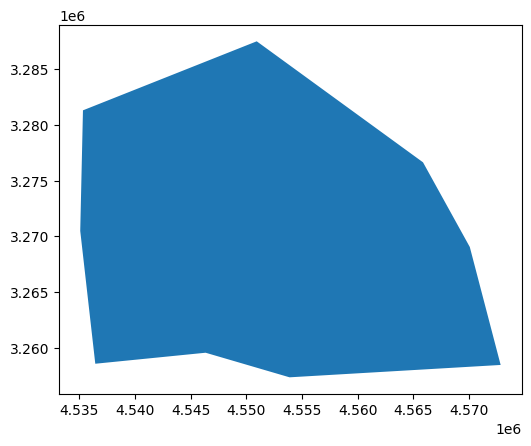

In [10]:
de_gdf[de_gdf.NUTS_ID == 'DE300'].plot()

#### some other geometry related properties that can be useful

In [11]:
# boundary 
# centroid 
# buffer 
de_gdf.centroid

7      POINT (4261402.186 2851572.304)
8      POINT (4242717.933 2841379.682)
9      POINT (4273337.598 2838986.594)
10     POINT (4300611.546 2839806.207)
11     POINT (4255935.031 2869044.643)
                    ...               
638    POINT (4202968.034 2923721.928)
639    POINT (4183093.493 2980382.853)
820    POINT (4193844.732 2890543.763)
821    POINT (4154832.401 2928050.302)
822    POINT (4137668.325 2940119.800)
Length: 401, dtype: geometry

In [12]:
# length
# area

In [13]:
# intersects 
# distance 
# ...
# https://geopandas.org/en/stable/gallery/overlays.html

#### Import a new GeoDataFrame with airport locations

In [14]:
airports = gpd.read_file('Input/SHAPE/AIRP_PT_2013.shp')

In [15]:
airports

,OBJECTID,AIRP_ICAO_,AIRP_HIER,AIRP_NAME_,CNTR_CODE,AIRP_ICRG_,IATA_CODE,AIRP_PASS,PUBL_FLAG,IFR,...,AIRP_CITY,ALT,LAT_EUR,LON_EUR,AIRP_USE,AIRP_GROUP,AIRP_GETIS,AIRP_ID,AIRP_LCOV_,geometry
0,84,LEHC,1,MONFLORITE / HUESCA,ES,LE,HSK,9,Y,N,...,Huesca,539,42.080799,-0.323300,6,A,N,84,0,POINT (-0.32330 42.08080)
1,93,LTBQ,1,KOCAELI/TOPEL,TR,LT,KCO,0,N,N,...,Kocaeli,62,40.733299,30.083300,6,A,N,93,0,POINT (30.08330 40.73330)
2,100,EVLA,1,LIEPAJA INTL,LV,EV,LPX,0,Y,N,...,Liepaya,5,56.517502,21.096901,6,A,N,100,218,POINT (21.09690 56.51750)
3,373,LHPP,1,PECS-POGANY,HU,LH,PEV,9,Y,N,...,Pecs,304,45.989399,18.242201,6,A,N,373,0,POINT (18.24220 45.98940)
4,1902,USHB,1,BEREZOVO,RU,US,EZV,9,Y,N,...,Berezovo,30,63.921112,65.030556,6,C,N,1902,0,POINT (65.03056 63.92111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,11887,EGSB,1,BEDFORD (CASTLE MILL),UK,EG,None,0,Y,Y,...,Bedford (Castle Mill),24,52.143475,-0.406240,6,A,N,11887,0,POINT (-0.40624 52.14347)
2843,11888,EGSD,1,GREAT YARMOUTH {NORTH DENES),UK,EG,None,0,Y,Y,...,Great Yarmouth {North Denes),11888,52.634506,1.726366,6,A,N,11888,0,POINT (1.72637 52.63450)
2844,11889,EIKK,1,KILKENNY,IE,EI,KKY,0,Y,N,...,Kilkenny,84,52.650921,-7.296016,6,A,N,11889,0,POINT (-7.29602 52.65092)
2845,11890,GECT,1,HELIPUERTO DE CEUTA,ES,GE,JCU,0,Y,Y,...,Helipuerto De Ceuta,4,35.892700,-5.306286,6,A,N,11890,0,POINT (-5.30629 35.89270)


<Axes: >

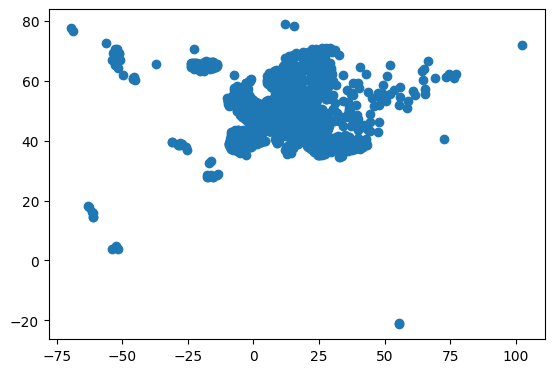

In [16]:
airports.plot()

In [17]:
# from: https://ec.europa.eu/eurostat/de/web/gisco/geodata/reference-data/transport-networks
airports = gpd.read_file("Input/SHAPE/AIRP_PT_2013.shp")

#### Take a look at the DataFrame and plot it.

In [18]:
airports

,OBJECTID,AIRP_ICAO_,AIRP_HIER,AIRP_NAME_,CNTR_CODE,AIRP_ICRG_,IATA_CODE,AIRP_PASS,PUBL_FLAG,IFR,...,AIRP_CITY,ALT,LAT_EUR,LON_EUR,AIRP_USE,AIRP_GROUP,AIRP_GETIS,AIRP_ID,AIRP_LCOV_,geometry
0,84,LEHC,1,MONFLORITE / HUESCA,ES,LE,HSK,9,Y,N,...,Huesca,539,42.080799,-0.323300,6,A,N,84,0,POINT (-0.32330 42.08080)
1,93,LTBQ,1,KOCAELI/TOPEL,TR,LT,KCO,0,N,N,...,Kocaeli,62,40.733299,30.083300,6,A,N,93,0,POINT (30.08330 40.73330)
2,100,EVLA,1,LIEPAJA INTL,LV,EV,LPX,0,Y,N,...,Liepaya,5,56.517502,21.096901,6,A,N,100,218,POINT (21.09690 56.51750)
3,373,LHPP,1,PECS-POGANY,HU,LH,PEV,9,Y,N,...,Pecs,304,45.989399,18.242201,6,A,N,373,0,POINT (18.24220 45.98940)
4,1902,USHB,1,BEREZOVO,RU,US,EZV,9,Y,N,...,Berezovo,30,63.921112,65.030556,6,C,N,1902,0,POINT (65.03056 63.92111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,11887,EGSB,1,BEDFORD (CASTLE MILL),UK,EG,None,0,Y,Y,...,Bedford (Castle Mill),24,52.143475,-0.406240,6,A,N,11887,0,POINT (-0.40624 52.14347)
2843,11888,EGSD,1,GREAT YARMOUTH {NORTH DENES),UK,EG,None,0,Y,Y,...,Great Yarmouth {North Denes),11888,52.634506,1.726366,6,A,N,11888,0,POINT (1.72637 52.63450)
2844,11889,EIKK,1,KILKENNY,IE,EI,KKY,0,Y,N,...,Kilkenny,84,52.650921,-7.296016,6,A,N,11889,0,POINT (-7.29602 52.65092)
2845,11890,GECT,1,HELIPUERTO DE CEUTA,ES,GE,JCU,0,Y,Y,...,Helipuerto De Ceuta,4,35.892700,-5.306286,6,A,N,11890,0,POINT (-5.30629 35.89270)


#### Find Airports in Germany

<Axes: >

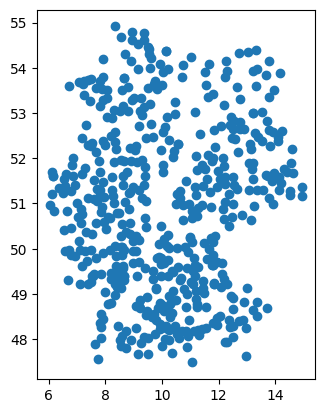

In [19]:
# find airports in Germany
# plot them
de_airports = airports[airports['CNTR_CODE']=='DE']
de_airports.plot()

<Axes: >

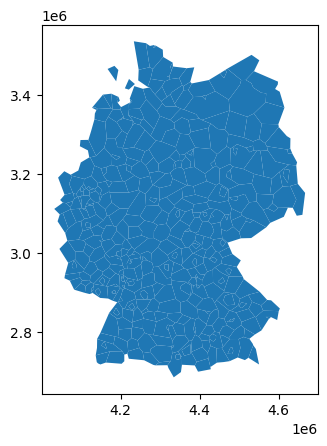

In [20]:
de_gdf.plot()

#### Plot both Dataframes in the same plot. Each DataFrame represents a layer.

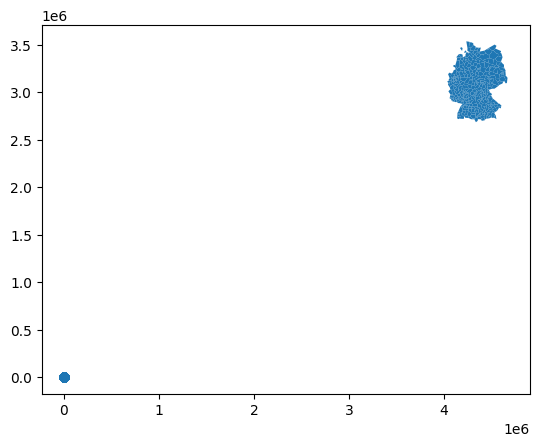

In [21]:
fig, ax = plt.subplots()
de_airports.plot(ax=ax)
de_gdf.plot(ax=ax)
plt.show()

#### We need to align the reference coordinate systems of both dataframes
Access the reference coordinate system of the Dataframes with the help of the .crs attribute

In [22]:
de_airports.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
de_gdf.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

#### Transform the coordinate systems with the help of the .to_crs() function.

In [24]:
de_airports.to_crs(3035, inplace=True)

C:\Users\jhollnagel\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


#### Plot both Dataframes in the same plot again.

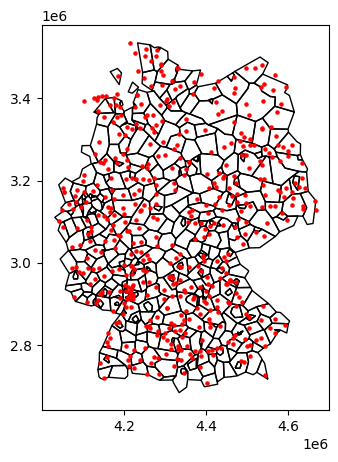

In [25]:
fig, plt_axes = plt.subplots(figsize=(10, 5))
de_gdf.plot(ax=plt_axes, facecolor='None')
de_airports.plot(ax=plt_axes, markersize=5, color='red')
plt.show()

In [26]:
#!pip install folium

In [27]:
#de_airports.explore()

# Part 2: Add additional data to the GeoDataFrame - Population

In [28]:
# read Data about pooulation
csv = pd.read_csv('Input/demo_r_pjangrp3_1_Data.csv', sep=',', encoding='iso-8859-1')
csv = csv[csv['SEX'] == 'Insgesamt' ]
csv.head()

,TIME,GEO,SEX,UNIT,AGE,Value,Flag and Footnotes
0,2018,EU28,Insgesamt,Anzahl,Insgesamt,512.379.225,NaN
3,2018,EU27,Insgesamt,Anzahl,Insgesamt,508.273.732,NaN
6,2018,BE,Insgesamt,Anzahl,Insgesamt,11.398.589,NaN
9,2018,BE1,Insgesamt,Anzahl,Insgesamt,1.205.492,NaN
12,2018,BE10,Insgesamt,Anzahl,Insgesamt,1.205.492,NaN


In [29]:
# tidy up, convert to integer values
pop = pd.Series(csv['Value'].values, index=csv['GEO'].values)
pop = pop.apply(lambda x: x.replace('.',''))
pop = pop[ pop != ':' ]
pop = pop.astype(np.int64)
pop.name = 'population'
pop.head()

EU28    512379225
EU27    508273732
BE       11398589
BE1       1205492
BE10      1205492
Name: population, dtype: int64

#### When joining DataFrames it can be very helpful if both use the same index
Look at GeoDataFrame and set the column "NUTS_ID" as the index

In [30]:
de_gdf = de_gdf[de_gdf['LEVL_CODE']==3]

In [31]:
de_gdf.set_index('NUTS_ID', inplace=True, drop=True)
de_gdf

,id,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
NUTS_ID,,,,,,,,,,
DE111,DE111,3,DE,"Stuttgart, Stadtkreis","Stuttgart, Stadtkreis",4,1,3,DE111,"POLYGON ((4270536.057 2851476.289, 4255088.909..."
DE112,DE112,3,DE,Böblingen,Böblingen,4,1,3,DE112,"POLYGON ((4252217.799 2849575.844, 4255088.909..."
DE113,DE113,3,DE,Esslingen,Esslingen,4,1,3,DE113,"POLYGON ((4284449.742 2849080.646, 4290190.894..."
DE114,DE114,3,DE,Göppingen,Göppingen,3,1,3,DE114,"POLYGON ((4320099.958 2845990.994, 4316876.010..."
DE115,DE115,3,DE,Ludwigsburg,Ludwigsburg,4,1,3,DE115,"POLYGON ((4265508.804 2859588.505, 4252217.799..."
...,...,...,...,...,...,...,...,...,...,...
DEB3I,DEB3I,3,DE,Rhein-Pfalz-Kreis,Rhein-Pfalz-Kreis,4,1,3,DEB3I,"POLYGON ((4206911.176 2942403.665, 4206908.444..."
DEB3J,DEB3J,3,DE,Mainz-Bingen,Mainz-Bingen,4,2,3,DEB3J,"POLYGON ((4161636.720 2997328.394, 4171106.022..."
DEB3E,DEB3E,3,DE,Germersheim,Germersheim,4,1,3,DEB3E,"POLYGON ((4205446.560 2905334.120, 4199706.802..."


In [32]:
pop.index

Index(['EU28', 'EU27', 'BE', 'BE1', 'BE10', 'BE100', 'BE2', 'BE21', 'BE211',
       'BE212',
       ...
       'TRC12', 'TRC13', 'TRC2', 'TRC21', 'TRC22', 'TRC3', 'TRC31', 'TRC32',
       'TRC33', 'TRC34'],
      dtype='object', length=2032)

In [33]:
de_gdf.index

Index(['DE111', 'DE112', 'DE113', 'DE114', 'DE115', 'DE116', 'DE117', 'DE118',
       'DE119', 'DE11A',
       ...
       'DEB3A', 'DEB3B', 'DEB3C', 'DEB3D', 'DEB3H', 'DEB3I', 'DEB3J', 'DEB3E',
       'DEB3F', 'DEB3G'],
      dtype='object', name='NUTS_ID', length=401)

In [34]:
# filter population for country = Germany
pop = pop[pop.index.isin(de_gdf.index)]
pop

DE111    632743
DE112    389548
DE113    532447
DE114    256345
DE115    542630
          ...  
DEG0K     81501
DEG0L     99275
DEG0M     90650
DEG0N     42710
DEG0P    123764
Name: population, Length: 401, dtype: int64

#### Join the two DataFrames together using join function

In [35]:
population_gdf = de_gdf.join(pop)
population_gdf

,id,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,population
NUTS_ID,,,,,,,,,,,
DE111,DE111,3,DE,"Stuttgart, Stadtkreis","Stuttgart, Stadtkreis",4,1,3,DE111,"POLYGON ((4270536.057 2851476.289, 4255088.909...",632743
DE112,DE112,3,DE,Böblingen,Böblingen,4,1,3,DE112,"POLYGON ((4252217.799 2849575.844, 4255088.909...",389548
DE113,DE113,3,DE,Esslingen,Esslingen,4,1,3,DE113,"POLYGON ((4284449.742 2849080.646, 4290190.894...",532447
DE114,DE114,3,DE,Göppingen,Göppingen,3,1,3,DE114,"POLYGON ((4320099.958 2845990.994, 4316876.010...",256345
DE115,DE115,3,DE,Ludwigsburg,Ludwigsburg,4,1,3,DE115,"POLYGON ((4265508.804 2859588.505, 4252217.799...",542630
...,...,...,...,...,...,...,...,...,...,...,...
DEB3I,DEB3I,3,DE,Rhein-Pfalz-Kreis,Rhein-Pfalz-Kreis,4,1,3,DEB3I,"POLYGON ((4206911.176 2942403.665, 4206908.444...",153629
DEB3J,DEB3J,3,DE,Mainz-Bingen,Mainz-Bingen,4,2,3,DEB3J,"POLYGON ((4161636.720 2997328.394, 4171106.022...",209785
DEB3E,DEB3E,3,DE,Germersheim,Germersheim,4,1,3,DEB3E,"POLYGON ((4205446.560 2905334.120, 4199706.802...",128477


<Axes: >

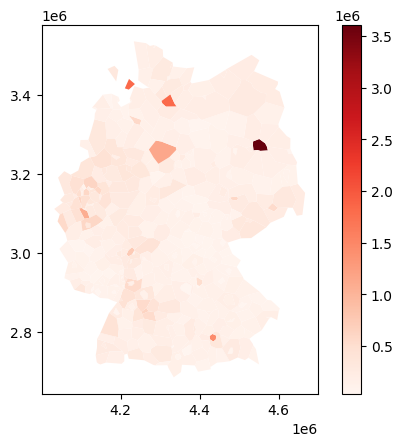

In [36]:
population_gdf.plot(column='population', legend=True, cmap='Reds')

#### Create a new column for population per km² and fill it 

In [37]:
de_gdf.area / 1000000

NUTS_ID
DE111    129.479811
DE112    653.776367
DE113    604.788072
DE114    601.113047
DE115    751.649439
            ...    
DEB3I    307.805843
DEB3J    735.458778
DEB3E    424.113764
DEB3F    530.609572
DEB3G    671.178601
Length: 401, dtype: float64

In [38]:
population_gdf['population']

NUTS_ID
DE111    632743
DE112    389548
DE113    532447
DE114    256345
DE115    542630
          ...  
DEB3I    153629
DEB3J    209785
DEB3E    128477
DEB3F    105649
DEB3G     70764
Name: population, Length: 401, dtype: int64

In [39]:
population_gdf['population'] / (de_gdf.area / 1000000)

NUTS_ID
DE111    4886.808169
DE112     595.842890
DE113     880.386080
DE114     426.450567
DE115     721.918985
            ...     
DEB3I     499.110083
DEB3J     285.243723
DEB3E     302.930512
DEB3F     199.108734
DEB3G     105.432444
Length: 401, dtype: float64

In [40]:
population_gdf['pop_density'] = population_gdf['population'] / (de_gdf.area / 1000000)

#### Plot the new map for population density 

<Axes: >

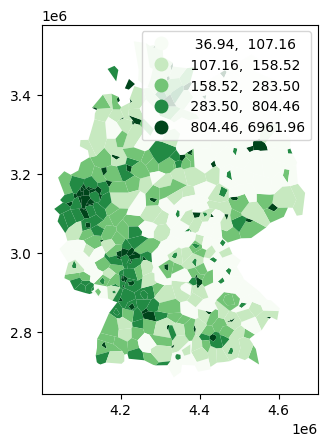

In [41]:
population_gdf.plot('pop_density', cmap='Greens', scheme='quantiles', legend=True)

In [42]:
population_gdf.explore(column='population')